# 42047: Data Processing Using Python

### Netflix Movies and TV Shows

 Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Purpose of the Project**

- **Primary Goal** : To extract meaningful insights from the Netflix dataset that can help understand the streaming service's content strategy, audience preferences, and market trends.

- **Decision-Making**: The analysis aims to provide data-driven insights that could inform decisions for content creators, marketers, and platform strategists.

- **Knowledge Contribution** : To contribute to the broader understanding of digital media trends, particularly in the context of on-demand streaming services.

- **Educational Aspect** : For individuals or teams conducting the analysis, the project serves as an opportunity to develop and showcase skills in data analysis, visualization, and interpretation.


### Objectives of the Data Analysis Project

**Understanding Content Distribution**:

Purpose: To analyze the distribution of different types of content (movies, TV shows) on Netflix.

Details: This might include looking at the proportion of movies vs. TV shows, trends over time, or distribution by country of origin.

**Genre Analysis**:

Purpose: To explore which genres are most prevalent on Netflix and how this might vary across regions or over time.

Details: Identifying popular genres, emerging trends in genre popularity, and any regional preferences in genres.

**Temporal Trends**:

Purpose: To examine how Netflix content has evolved over the years.

Details: This could involve analyzing the release years of content, spotting trends in production, and how the volume of content has grown or shifted.

**Audience and Rating Analysis**:

Purpose: To understand the target audience of Netflix content.

Details: Analyzing the distribution of content ratings (e.g., PG, R) and potentially correlating it with genre or popularity.

**Regional Preferences**:

Purpose: To investigate if certain countries or regions have specific preferences or produce distinct types of content.

Details: Looking at content availability, production, and popularity across different regions.

**Content Recommendation Strategies**:

Purpose: To propose strategies for content recommendation based on data insights.

Details: Using patterns and trends identified in the analysis to suggest how Netflix could tailor its recommendations to different user segments.

# Importing Libraries

In [186]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings as warnings
warnings.filterwarnings('ignore')

# Reading Data

### Error and Exception Handling

In [188]:
try:
    f = open('/Users/ahuja/Desktop/netflix_titles.csv')
except FileNotFoundError as fe:
    print("Sorry, File doesn't exist")
except Exception as e:
    print("Sorry, Something went wrong.")
else:
    print(f.read())
    f.close()
finally:
    print ("File closed successfully")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Data Loading and Preprocessing

**Purpose**

The purpose of this section is to clearly document how you load the Netflix dataset into your analysis environment and the preprocessing steps you undertake to prepare the data for analysis. This section is crucial as it sets the foundation for your entire analysis.

In [189]:
nfdf = pd.read_csv('/Users/ahuja/Desktop/netflix_titles.csv')

### Printing the information of the attributes i.e. indexes and datatypes 

In [190]:
nfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Description of Dataset

In [191]:
#printing the dataframe
nfdf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [192]:
#Printing the Dimensions of the dataframe (rows, columns)

print(nfdf.shape)

(8807, 12)


In [193]:
#Printing the list of columns in the netflix dataset

print(nfdf.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [194]:
nfdf.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### Checking the datatypes of columns

In [195]:
nfdf.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [196]:
#printing the size of the elements in the dataframe 
print(nfdf.size)

105684


In [197]:
#Checking statistics of columns for the object data type
nfdf.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [198]:
#Checking statistics of columns for the int64 data type
nfdf.describe(include=['int64'])

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Preprocessing

### Splitting the Column Date added for solving the business problem 

In [199]:
# Since date_added column is of object data type , thus converting it to datetime format
nfdf["date_added"] = pd.to_datetime(nfdf['date_added'])

In [200]:
nfdf['Month_uploaded']= nfdf ['date_added'].dt.month
nfdf['Year_uploaded'] = nfdf ['date_added'].dt.year

#since month is in float data type, adding a column with the month name using month_name() function available in pandas
nfdf['MonthName']= nfdf ['date_added'].dt.month_name()

In [201]:
#Rechecking the columns and its datatypes

nfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        6173 non-null   object        
 4   cast            7982 non-null   object        
 5   country         7976 non-null   object        
 6   date_added      8797 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8803 non-null   object        
 9   duration        8804 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  Month_uploaded  8797 non-null   float64       
 13  Year_uploaded   8797 non-null   float64       
 14  MonthName       8797 non-null   object        
dtypes: d

In [202]:
#Checking statistics of columns for the datetime data type
nfdf.describe(include=['datetime64'])

,date_added
count,8797
unique,1714
top,2020-01-01 00:00:00
freq,110
first,2008-01-01 00:00:00
last,2021-09-25 00:00:00


In [203]:
#Checking statistics of columns for the float64 data type
nfdf.describe(include=['float64'])

,Month_uploaded,Year_uploaded
count,8797.000000,8797.000000
mean,6.654996,2018.871888
std,3.436554,1.574243
min,1.000000,2008.000000
25%,4.000000,2018.000000
50%,7.000000,2019.000000
75%,10.000000,2020.000000
max,12.000000,2021.000000


### Checking the unique values of the dataframe 

In [204]:
nfdf.nunique()

show_id           8807
type                 2
title             8807
director          4528
cast              7692
country            748
date_added        1714
release_year        74
rating              17
duration           220
listed_in          514
description       8775
Month_uploaded      12
Year_uploaded       14
MonthName           12
dtype: int64

In [205]:
# Checking the unique values of a single colum "rating"
nfdf.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [206]:
# Number of values in the rows of dataframe
nfdf.count()

show_id           8807
type              8807
title             8807
director          6173
cast              7982
country           7976
date_added        8797
release_year      8807
rating            8803
duration          8804
listed_in         8807
description       8807
Month_uploaded    8797
Year_uploaded     8797
MonthName         8797
dtype: int64

## Checking the duplicate values

In [207]:
nfdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [208]:
#Printing the duplicate values in the dataframe 
nfdf[nfdf.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_uploaded,Year_uploaded,MonthName


There are no duplicate values in this dataframe 

## Checking for Null Values

In [209]:
nfdf.isnull().sum()

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added          10
release_year         0
rating               4
duration             3
listed_in            0
description          0
Month_uploaded      10
Year_uploaded       10
MonthName           10
dtype: int64

In [210]:
# Total number of null values in the dataframe 
nfdf.isnull().sum().sum()

4337

## Visualising the Missing Values 

<AxesSubplot:>

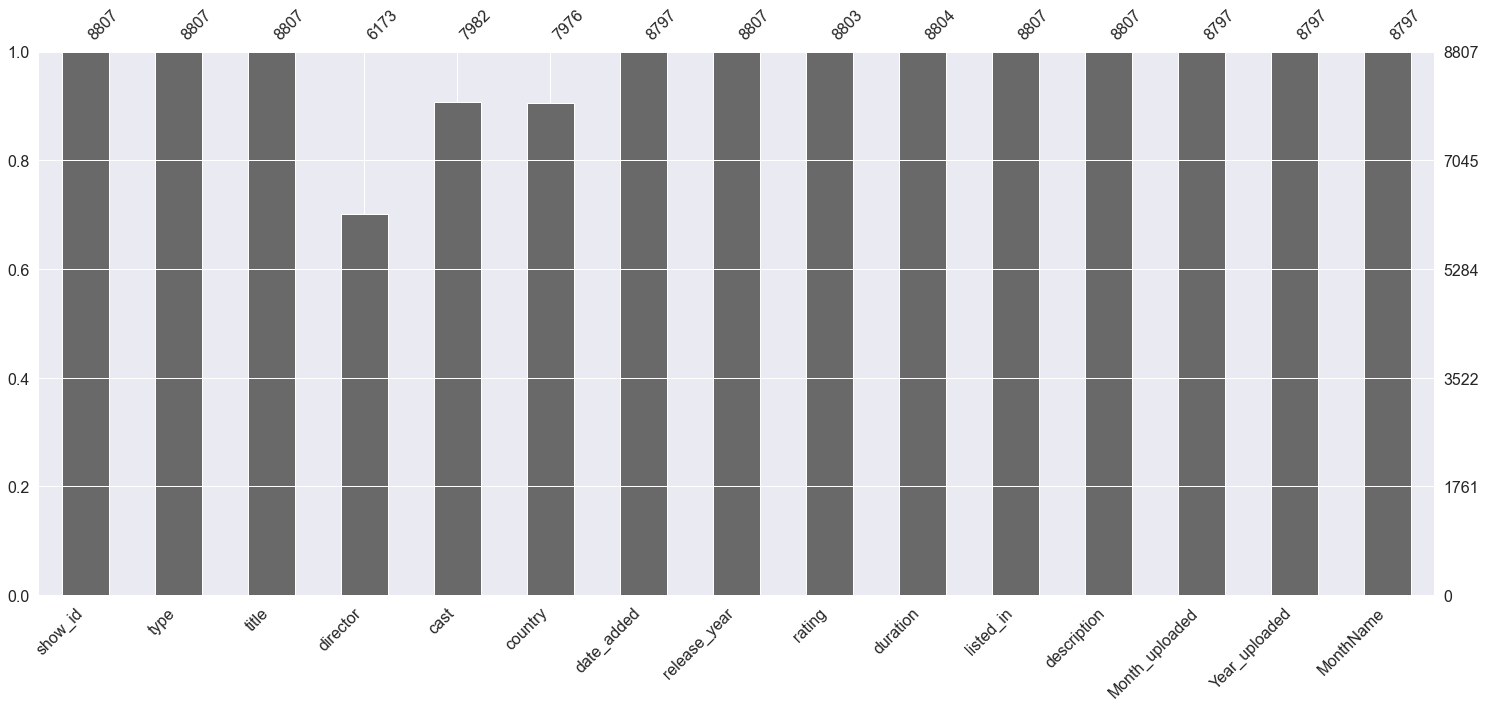

In [211]:
msno.bar(nfdf)

<AxesSubplot:>

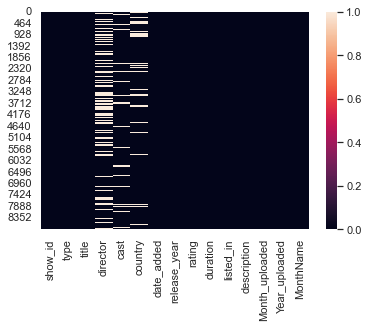

In [212]:
sns.heatmap(nfdf.isnull())

<AxesSubplot:>

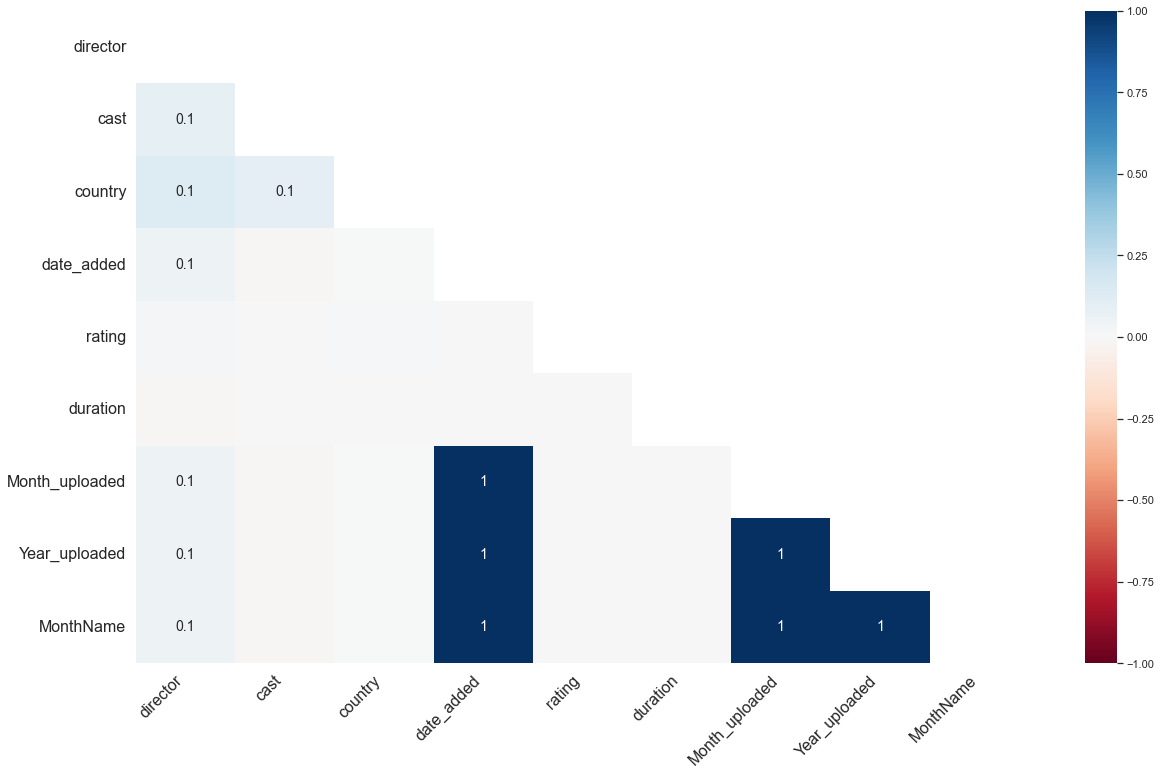

In [213]:
msno.heatmap(nfdf)

<AxesSubplot:>

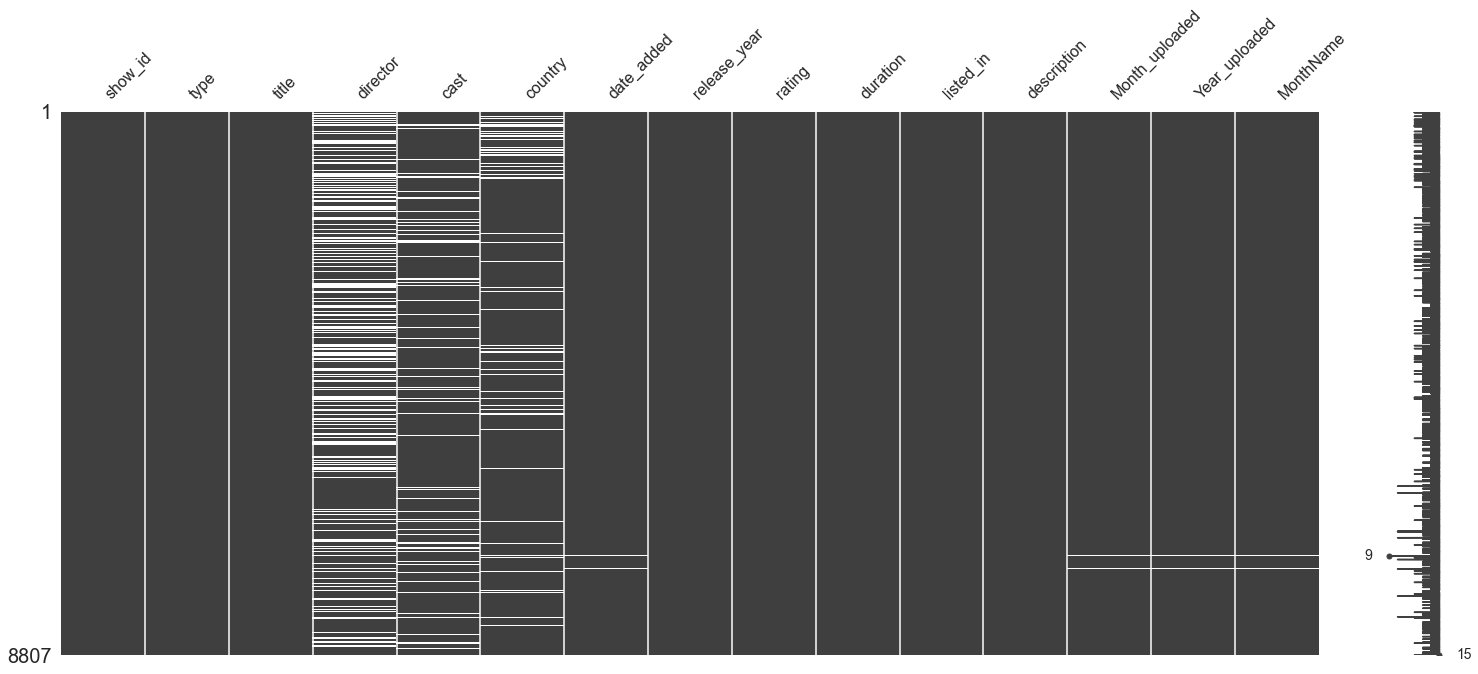

In [214]:
msno.matrix(nfdf)

### Dealing with Missing Values 

In [215]:
# Using thresh to analyse the number of missing values in a particular row
nfdf = nfdf.dropna(thresh=3)

In [216]:
# Dropping the missing values of date_added, rating and duration
nfdf.dropna( subset=['rating', 'duration','date_added'], inplace=True)

In [217]:
# Replacing the missing values with NA in the column - country as it is important for the visualisation and business problem
#replacing the missing values in the column director and cast as they are in large volume
nfdf['director'].replace(np.nan, 'NA',inplace  = True)
nfdf['cast'].replace(np.nan, 'NA',inplace  = True)
nfdf['country'].replace(np.nan, 'NA',inplace  = True)

In [218]:
nfdf.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
Month_uploaded    0
Year_uploaded     0
MonthName         0
dtype: int64

In [219]:
nfdf.isnull().sum().sum()

0

## Outlier Identification

Detecting Outlier, can be only applied to numeric values

Text(0.5, 0, 'Release Year')

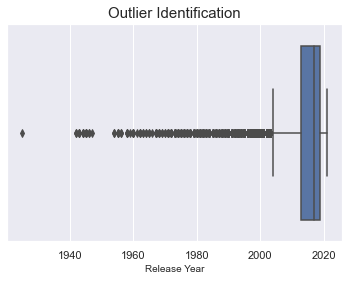

In [220]:
sns.boxplot(x=nfdf['release_year'])
plt.title('Outlier Identification', fontsize=15 )
plt.xlabel('Release Year', fontsize=10)

In [221]:
#Defining the Quartiles for removal of outliers
Q1 = nfdf['release_year'].quantile(0.25) 
Q3 = nfdf['release_year'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Inter quartile Range(IQR), i.e. difference between the 25th and 75th quantiles

lowOutlier = Q1 - 1.5 * IQR
highOutlier = Q3 + 1.5 * IQR
totalOutlier = ((nfdf['release_year'] < lowOutlier) | (nfdf['release_year'] > highOutlier)).sum()
print("Total Number of the Outliers in the release_year are {}".format(totalOutlier))


Total Number of the Outliers in the release_year are 717


In [222]:
nfdf_filter = nfdf[(nfdf["release_year"] < highOutlier) & (nfdf["release_year"] > lowOutlier)]

In [223]:
#validating the removal of outlier
totalOutlier = ((nfdf_filter['release_year'] < lowOutlier) | (nfdf_filter['release_year'] > highOutlier)).sum()
print("Total Number of Outliers in the release_year are {}".format(totalOutlier))

Total Number of Outliers in the release_year are 0


In [224]:
#Printing the information of the attributes 

nfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   object        
 2   title           8790 non-null   object        
 3   director        8790 non-null   object        
 4   cast            8790 non-null   object        
 5   country         8790 non-null   object        
 6   date_added      8790 non-null   datetime64[ns]
 7   release_year    8790 non-null   int64         
 8   rating          8790 non-null   object        
 9   duration        8790 non-null   object        
 10  listed_in       8790 non-null   object        
 11  description     8790 non-null   object        
 12  Month_uploaded  8790 non-null   float64       
 13  Year_uploaded   8790 non-null   float64       
 14  MonthName       8790 non-null   object        
dtypes: d

In [225]:
nfdf_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8009 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8009 non-null   object        
 1   type            8009 non-null   object        
 2   title           8009 non-null   object        
 3   director        8009 non-null   object        
 4   cast            8009 non-null   object        
 5   country         8009 non-null   object        
 6   date_added      8009 non-null   datetime64[ns]
 7   release_year    8009 non-null   int64         
 8   rating          8009 non-null   object        
 9   duration        8009 non-null   object        
 10  listed_in       8009 non-null   object        
 11  description     8009 non-null   object        
 12  Month_uploaded  8009 non-null   float64       
 13  Year_uploaded   8009 non-null   float64       
 14  MonthName       8009 non-null   object        
dtypes: d

# Data Visualisation

In [226]:
sns.set_theme(style="darkgrid")

In [227]:
nfdf_filter['type'].value_counts()

Movie      5427
TV Show    2582
Name: type, dtype: int64

### Content Type Distribution Plot

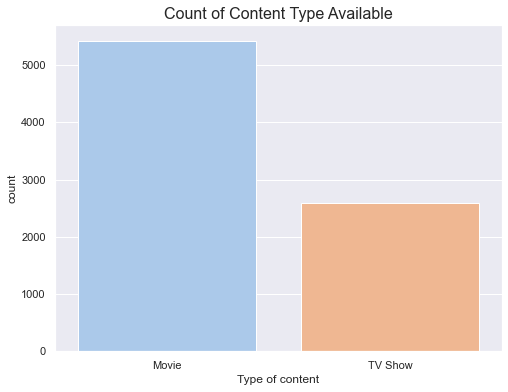

In [228]:
plt.figure(figsize=(8,6))
sns.countplot(data=nfdf_filter, x='type', palette='pastel')
plt.title('Count of Content Type Available', fontsize = 16)
plt.xlabel('Type of content', fontsize=12)
plt.show()

**This bar plot shows the distribution of content types (movies and TV shows) on Netflix. The key insights from this plot are the proportion of movies to TV shows and how this proportion has evolved over time.**

Insight: Note the balance between movies and TV shows. A higher number of movies could suggest a focus on diverse, one-time content, while more TV shows might indicate a strategy to keep viewers engaged over longer periods.

### Rating Distribution Plot

In [229]:
nfdf_rat = nfdf_filter['rating'].value_counts().nlargest(5)
nfdf_rat

TV-MA    3113
TV-14    1969
TV-PG     786
R         631
PG-13     372
Name: rating, dtype: int64

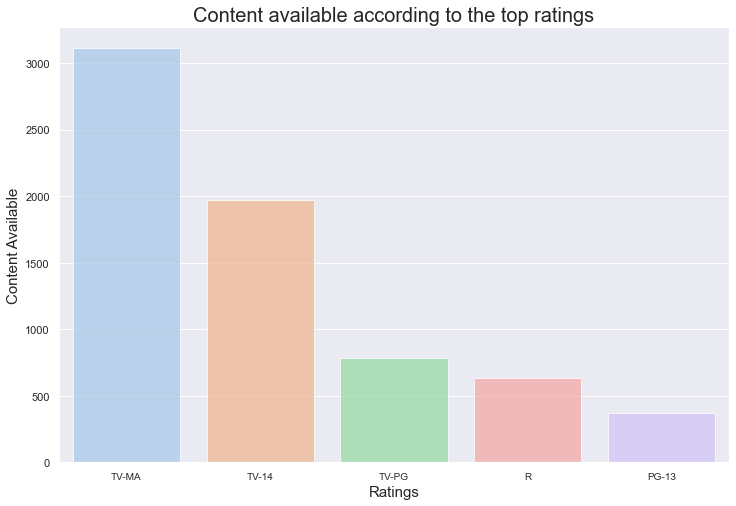

In [230]:
plt.figure(figsize=(12,8))
sns.barplot(x=nfdf_rat.index, y=nfdf_rat, alpha=0.75, palette='pastel')
plt.title('Content available according to the top ratings', fontsize=20)
plt.ylabel('Content Available',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.xticks(fontsize=10)
plt.show()

**Here, we visualize the distribution of content ratings. This plot is essential to understand the target audience for Netflix content and how it aligns with the platform's content strategy.**

Insight: Analyze the prevalence of different ratings (e.g., PG, R). A concentration of mature content might suggest targeting an older audience, while more family-friendly ratings indicate a broader target demographic.


This information can be beneficial to the industry leader in deciding the distribution of
content in respect of the rating of viewers according to the available content. Additionally, it
is helpful for people to analyse the movies and tv shows content in respect of the rating they
got from the authorized certification committee. 


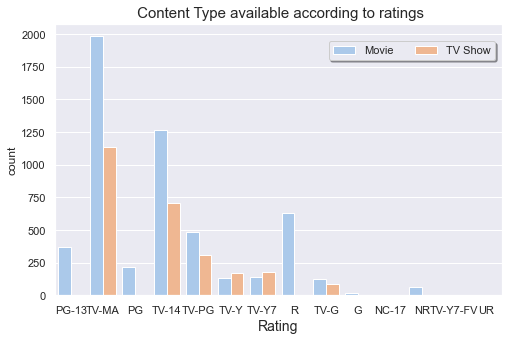

In [231]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=nfdf_filter, x='rating', hue='type', palette='pastel')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Regional Content Availability

 **Differences in content availability across regions could reflect cultural preferences or licensing agreements**

In [232]:
nfdf_con = nfdf_filter['country'].value_counts().nlargest(11)
nfdf_con

United States     2470
India              840
NA                 799
United Kingdom     394
Japan              222
South Korea        198
Canada             178
Spain              145
France             121
Mexico             103
Turkey             101
Name: country, dtype: int64

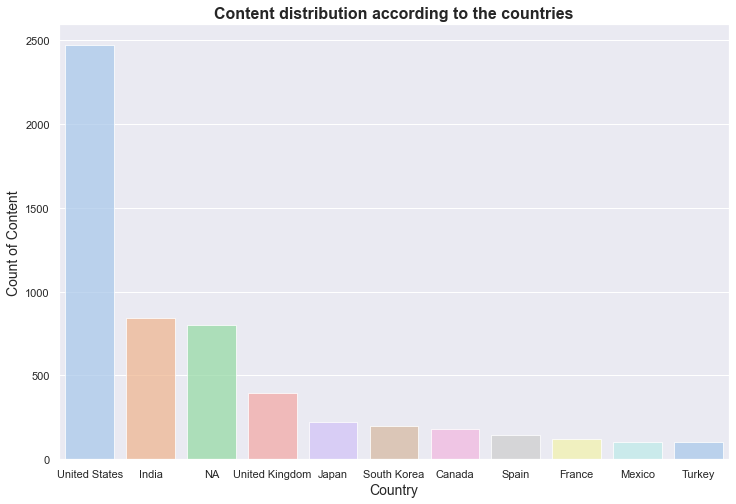

In [233]:
plt.figure(figsize=(12,8))
sns.barplot(x=nfdf_con.index, y=nfdf_con, alpha=0.75, palette='pastel')
plt.title('Content distribution according to the countries', fontsize=16, fontweight="bold")
plt.ylabel('Count of Content',fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(fontsize=11)
plt.show()

Observe variations in content across different regions. This can reveal Netflix's market-specific strategies, such as focusing on local content in certain regions to cater to cultural preferences.

By visualising the content available according to the geographical data, it would be beneficial
to industry leaders to decide which type of content is famous and liked by people to watch in
which region.

NA denotes “not available” which I have replaced while dealing with
missing values. 

In [234]:
nfdf_top_con = nfdf_filter.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico", "Turkey"]')
nfdf_top_con.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_uploaded,Year_uploaded,MonthName
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,September
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0,2021.0,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,2021.0,September
15,s16,TV Show,Dear White People,NA,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9.0,2021.0,September


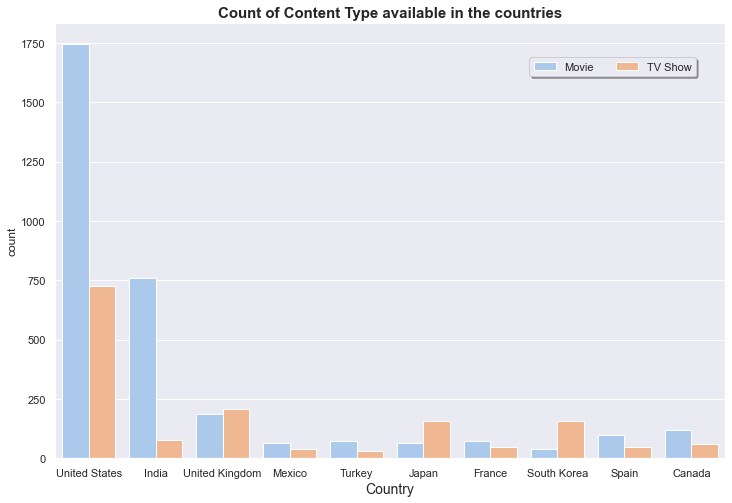

In [235]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=nfdf_top_con, x='country', hue='type', palette='pastel')
plt.title('Count of Content Type available in the countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.show()

The above plot represents the content according to their types, it can be inference that Japan,
South Korea and the United Kingdom are the only countries in which TV shows have more 
content than movies; it can be thought of as the people tend to watch more TV shows than
movies in these countries. In contrast, the content available on Netflix is majorly movies.

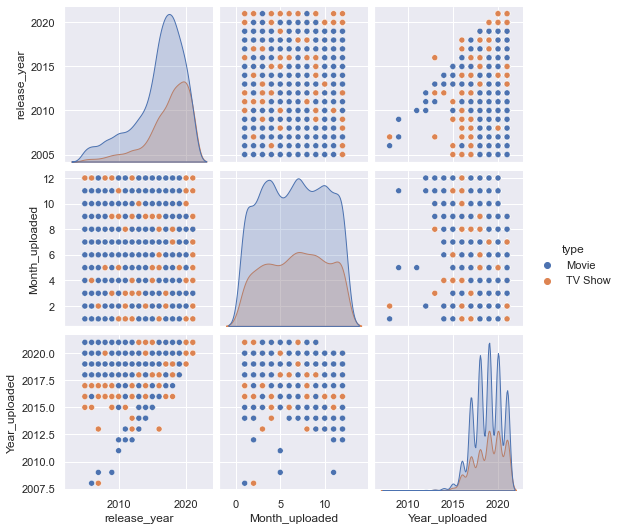

In [236]:
sns.pairplot(nfdf_filter, hue  = 'type')

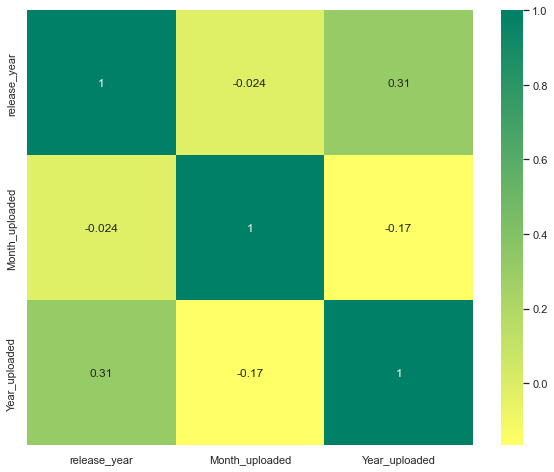

In [237]:
# Displaying the correlation plot of the numerical values
corr = nfdf_filter.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')
plt.show() 

In [238]:
nfdf_filter[['Value', 'Content_Type']] = nfdf_filter.duration.str.split(' ', expand = True)
nfdf_filter.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_uploaded,Year_uploaded,MonthName,Value,Content_Type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,September,90,min
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,September,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,September,1,Season
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,September,1,Season
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,September,2,Seasons


In [239]:
mins = nfdf_filter.query('Content_Type == "min"')
mins.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_uploaded,Year_uploaded,MonthName,Value,Content_Type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,September,90,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NA,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,2021.0,September,91,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,2021.0,September,104,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,2021.0,September,127,min
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NA,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,9.0,2021.0,September,91,min


In [240]:
seasons = nfdf_filter.query('Content_Type == ["Season", "Seasons"]')
seasons.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_uploaded,Year_uploaded,MonthName,Value,Content_Type
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,September,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,September,1,Season
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,September,1,Season
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,September,2,Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NA,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,2021.0,September,1,Season


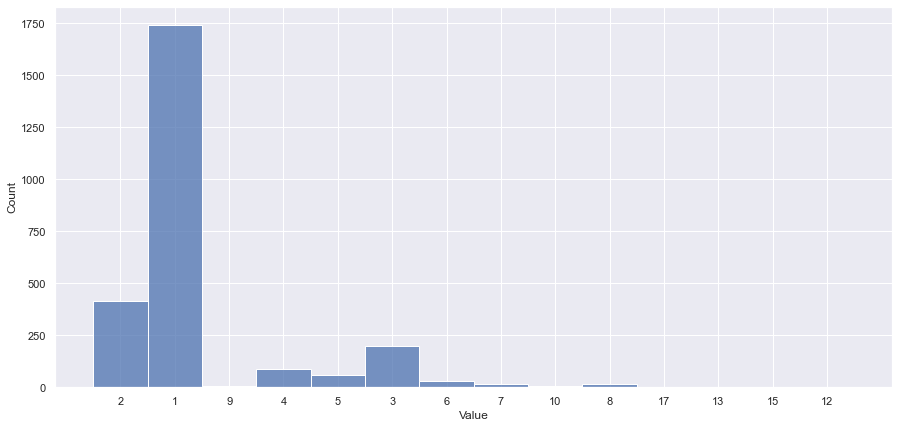

In [241]:
plt.figure(figsize=(15,7))
sns.histplot(data=seasons, x="Value") #order = [1,2,3,4])
plt.show()

### Release Year Analysis

Text(0.5, 0, 'Release Year')

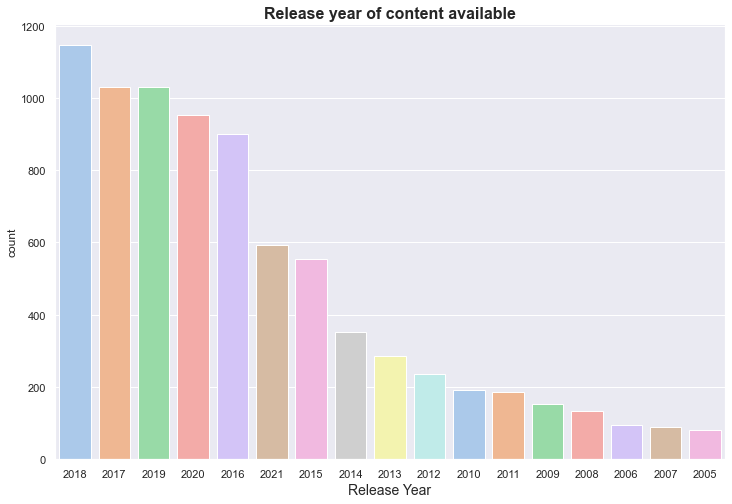

In [242]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="release_year", data=nfdf_filter, palette="pastel",
                  order = nfdf_filter["release_year"].value_counts().index)
plt.show
plt.title('Release year of content available', fontsize=16, fontweight="bold")
plt.xlabel('Release Year', fontsize=14)

**Insight: Observing the distribution of content by release year can reveal trends in content production over time. For instance, a recent uptick in the number of titles released might indicate an increase in content creation or acquisition by Netflix. This can also be reflective of the overall growth in the entertainment industry.**

The graph below shows that every year the content released gets increased except the year
2019, 2020 and 2021 which is due to the pandemic of coronavirus. 

### Content Upload Year Analysis

Text(0.5, 0, 'Year uploaded at Netflix')

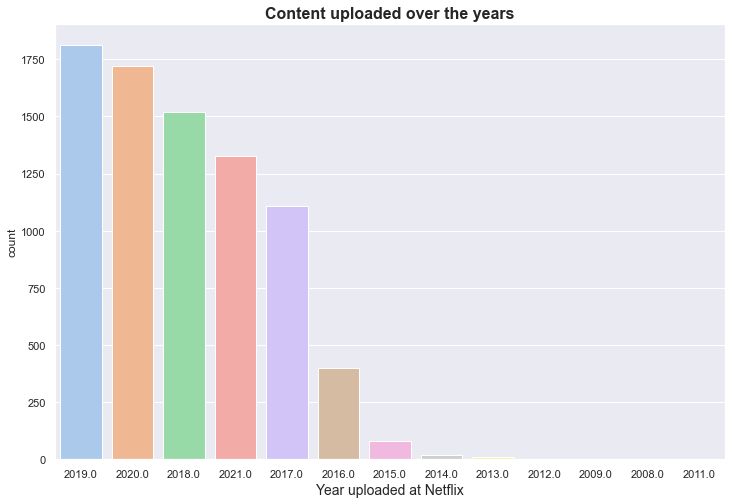

In [243]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Year_uploaded", data=nfdf_filter, palette="pastel",
                  order = nfdf_filter["Year_uploaded"].value_counts().index)
plt.show
plt.title('Content uploaded over the years', fontsize=16, fontweight="bold")
plt.xlabel('Year uploaded at Netflix', fontsize=14)

**Insight: Analyzing the content upload year can provide insights into Netflix's content acquisition and release strategy. A lag between release year and upload year could suggest a strategy of acquiring older titles, while a shorter lag or same-year uploads indicate a focus on fresh, newly released content. Additionally, a significant increase in uploads during certain years might correlate with business growth phases, market expansions, or competitive responses.** 

It is evident from the above plot that content uploaded on Netflix is in recent years stating the
information that people like to watch few old movies on Netflix. Moreover, the same pattern
of content reduction in years 2020 and 2021 can be seen in the uploading of content.
This information can help industry advisors in deciding which content to upload to Netflix.




### Comparison Between Release Year and Upload Year

Insight: Comparing these two metrics can reveal how quickly Netflix is able to add new content to its platform. For instance, a narrowing gap over time might suggest improvements in acquisition and licensing processes or a shift towards more original content that is available immediately upon release.

**These insights can be particularly enlightening when considering the evolving nature of content streaming services and their strategies in content curation and customer engagement. By delving into these aspects, you can provide a more nuanced understanding of the dynamics at play in Netflix's content management.**

# Conclusion and Discussion


**The Netflix dataset underwent comprehensive cleaning and preparation, ensuring the reliability of our data-driven insights. This process included handling outliers, missing values, and duplicate records, which are crucial steps to avoid misinformation or inaccuracies in the analysis.**

**The analysis comprised three main stages: Data Exploration, Data Cleaning, and Data Visualization. These steps were instrumental in uncovering valuable insights about the content distribution on Netflix, addressing key business questions and challenges.**

**Key insights obtained include an understanding of the distribution of content types, country-specific content preferences, and the popularity of content across different ratings. Additionally, we explored content duration, differentiating between the seasons of TV shows and the length of movies. This aspect of the analysis is particularly useful for identifying viewer preferences related to content length and for guiding content strategy decisions.**

**Ultimately, this analysis provides comprehensive insights into popular content ratings, preferences in different countries, and content duration preferences. These findings are crucial for industry advisors and decision-makers in strategizing content acquisition, creation, and distribution on the platform.**